
📊 Combined Approach Accuracy:
              precision    recall  f1-score   support

       False       0.64      0.56      0.60        45
        True       0.79      0.84      0.82        90

    accuracy                           0.75       135
   macro avg       0.72      0.70      0.71       135
weighted avg       0.74      0.75      0.74       135



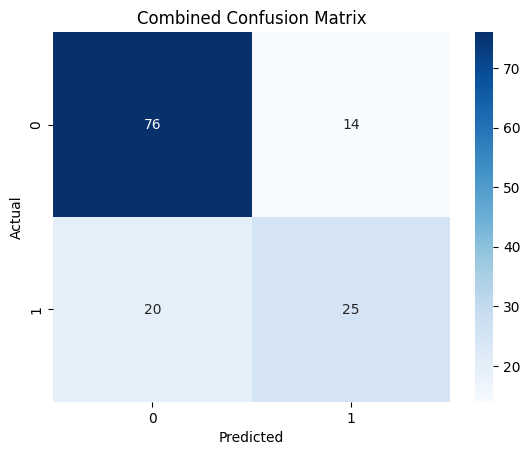

In [7]:
from pathlib import Path
import json, requests
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

TEST_FILE = Path("test_cases.jsonl")
API_URL = "http://localhost:8001/check-plagiarism"

def run_combined():
    y_true, y_pred = [], []

    with open(TEST_FILE, "r", encoding="utf-8") as f:
        for line in f:
            data = json.loads(line)
            code = data["code"]
            expected = data["expected"]
            payload = {"code": code, "top_k": 10}

            try:
                res = requests.post(API_URL, json=payload)
                result = res.json()
                predicted = result.get("plagiarism_detected", False)
                y_true.append(expected)
                y_pred.append(predicted)
            except Exception as e:
                print("❌", e)

    print("\n📊 Combined Approach Accuracy:")
    print(classification_report(y_true, y_pred, zero_division=0))

    cm = confusion_matrix(y_true, y_pred, labels=[True, False])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Combined Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

run_combined()



📊 Threshold Approach Accuracy:
              precision    recall  f1-score   support

       False       0.33      1.00      0.50        45
        True       0.00      0.00      0.00        90

    accuracy                           0.33       135
   macro avg       0.17      0.50      0.25       135
weighted avg       0.11      0.33      0.17       135



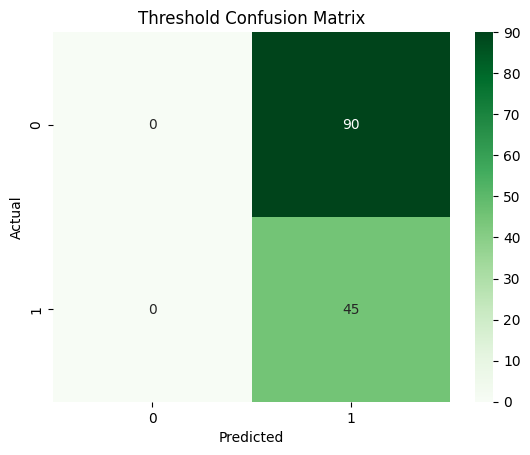

In [3]:
API_URL = "http://localhost:8003/search-similar"

def run_threshold():
    y_true, y_pred = [], []

    with open(TEST_FILE, "r", encoding="utf-8") as f:
        for line in f:
            data = json.loads(line)
            code = data["code"]
            expected = data["expected"]
            payload = {"code": code, "top_k": 10, "analyze_plagiarism": True}

            try:
                res = requests.post(API_URL, json=payload)
                result = res.json()
                predicted = result.get("plagiarism_detected", False)
                y_true.append(expected)
                y_pred.append(predicted)
            except Exception as e:
                print("❌", e)

    print("\n📊 Threshold Approach Accuracy:")
    print(classification_report(y_true, y_pred, zero_division=0))

    cm = confusion_matrix(y_true, y_pred, labels=[True, False])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title("Threshold Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

run_threshold()



📊 Only LLM Accuracy:
              precision    recall  f1-score   support

       False       0.34      1.00      0.50        45
        True       1.00      0.01      0.02        90

    accuracy                           0.34       135
   macro avg       0.67      0.51      0.26       135
weighted avg       0.78      0.34      0.18       135



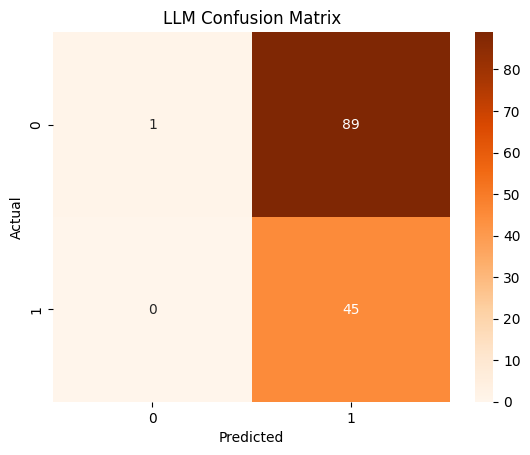

In [5]:
API_URL = "http://localhost:8002/check"

def run_llm_only():
    y_true, y_pred = [], []

    with open(TEST_FILE, "r", encoding="utf-8") as f:
        for line in f:
            data = json.loads(line)
            code = data["code"]
            expected = data["expected"]
            payload = {"code": code}

            try:
                res = requests.post(API_URL, json=payload)
                res.raise_for_status()

                result_text = res.text.strip().lower()
                predicted = result_text == "yes"  # True if "yes", else False

                y_true.append(expected)
                y_pred.append(predicted)

            except Exception as e:
                print(f"❌ Request failed: {e}")
                continue

    print("\n📊 Only LLM Accuracy:")
    print(classification_report(y_true, y_pred, zero_division=0))

    cm = confusion_matrix(y_true, y_pred, labels=[True, False])
    sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
    plt.title("LLM Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

run_llm_only()
